In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Lectura del conjunto de entrenamiento y prueba

In [ ]:
train1=pd.read_csv('/content/drive/MyDrive/Tweets/Entrenamiento/development.csv').drop(columns=['Unnamed: 0'])
train2=pd.read_csv('/content/drive/MyDrive/Tweets/Entrenamiento/training.csv').drop(columns=['Unnamed: 0'])

test=pd.read_csv('/content/drive/MyDrive/Tweets/Prueba/development_test.csv').drop(columns=['Unnamed: 0'])

# Conjunto inicial de entrenamiento y prueba

Se unen los dos conjuntos de entrenamiento creando un unico conjunto final

In [ ]:
train=pd.concat([train1,train2]).reset_index()
train=train.drop(columns=['index'])
train

,label,gender,profession,ideology_binary,ideology_multiclass,tweet
0,@user10,male,journalist,right,moderate_right,"EE UU y China: Los dos grandes pelean, el mund..."
1,@user10,male,journalist,right,moderate_right,Sensación Previsible a esta hora: Alegría [POL...
2,@user10,male,journalist,right,moderate_right,No te salves. no te quedes inmóvil al borde de...
3,@user10,male,journalist,right,moderate_right,"Al menos 25 militares venezolanos, todos de ba..."
4,@user10,male,journalist,right,moderate_right,"Rivera que , con Sanchez ,da una mayoría absol..."
...,...,...,...,...,...,...
42555,@user99,male,politician,left,left,El líder del [POLITICAL_PARTY] tira de la peli...
42556,@user99,male,politician,left,left,Esta noche he tenido el placer de escuchar y s...
42557,@user99,male,politician,left,left,Imaginemos que un kg lo producimos por 10€ en ...
42558,@user99,male,politician,left,left,"No lo había leído hasta ahora, si bien lo tení..."


##Comentarios

**Se observa que las opiniones fueron extraidos de personas del ambito, ya sean periodistas o los mismos politicos**

In [ ]:
set(train['profession'][:])

{'journalist', 'politician'}

Vemos que se tienen 2 y 4 clases respectivamente para los distintos problemas.

In [ ]:
set(train['ideology_binary'][:])

{'left', 'right'}

In [ ]:
set(train['ideology_multiclass'][:])

{'left', 'moderate_left', 'moderate_right', 'right'}

##¿Las clases estan equilibradas?

La respuesta es NO, lo cual es un problema parcial.

<AxesSubplot:title={'center':'Distribucion de problema binario'}>

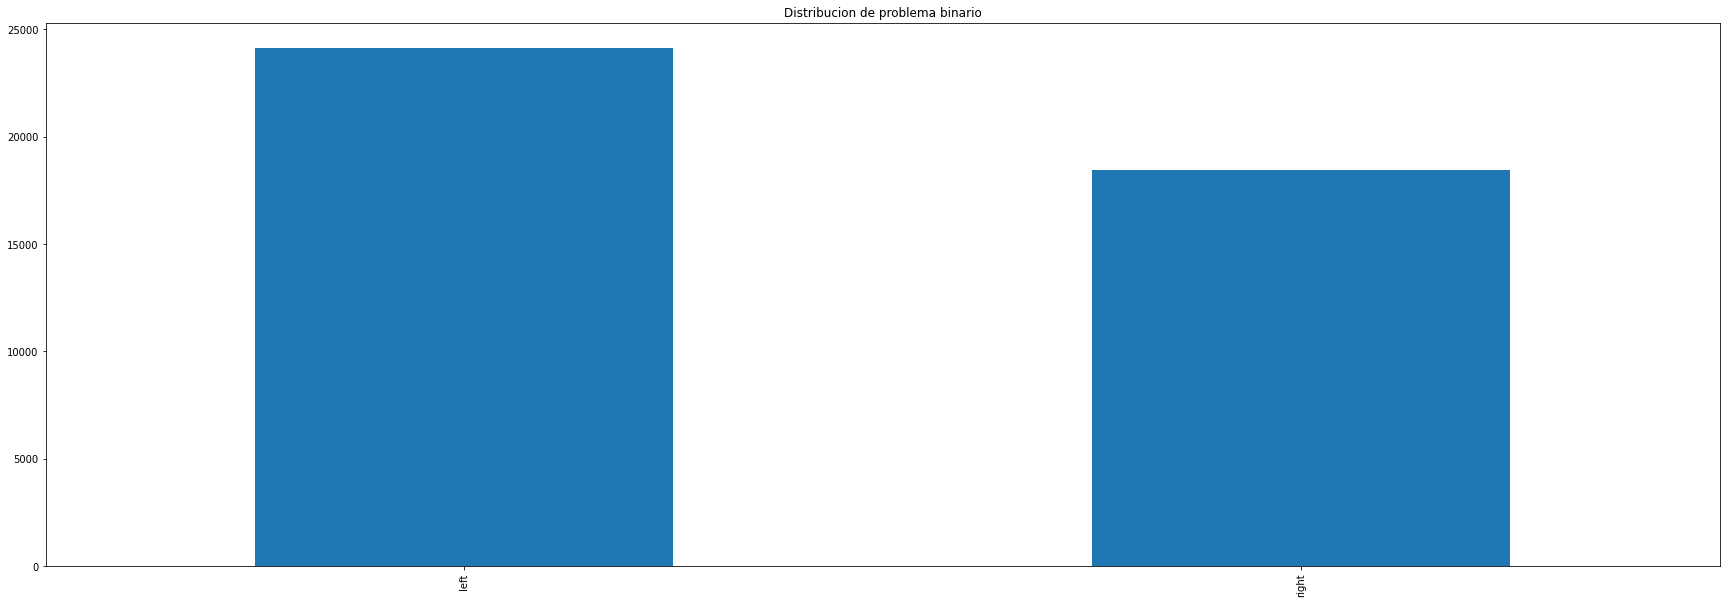

In [ ]:
train['ideology_binary'].value_counts().plot(kind='bar', figsize=(30,10), title='Distribucion de problema binario')

**Para el problema binario se observa una proporcion 55-45 o 60-40 aproximadamente entre la Izquierda y Derecha**

<AxesSubplot:title={'center':'Distribucion de problema multiclase'}>

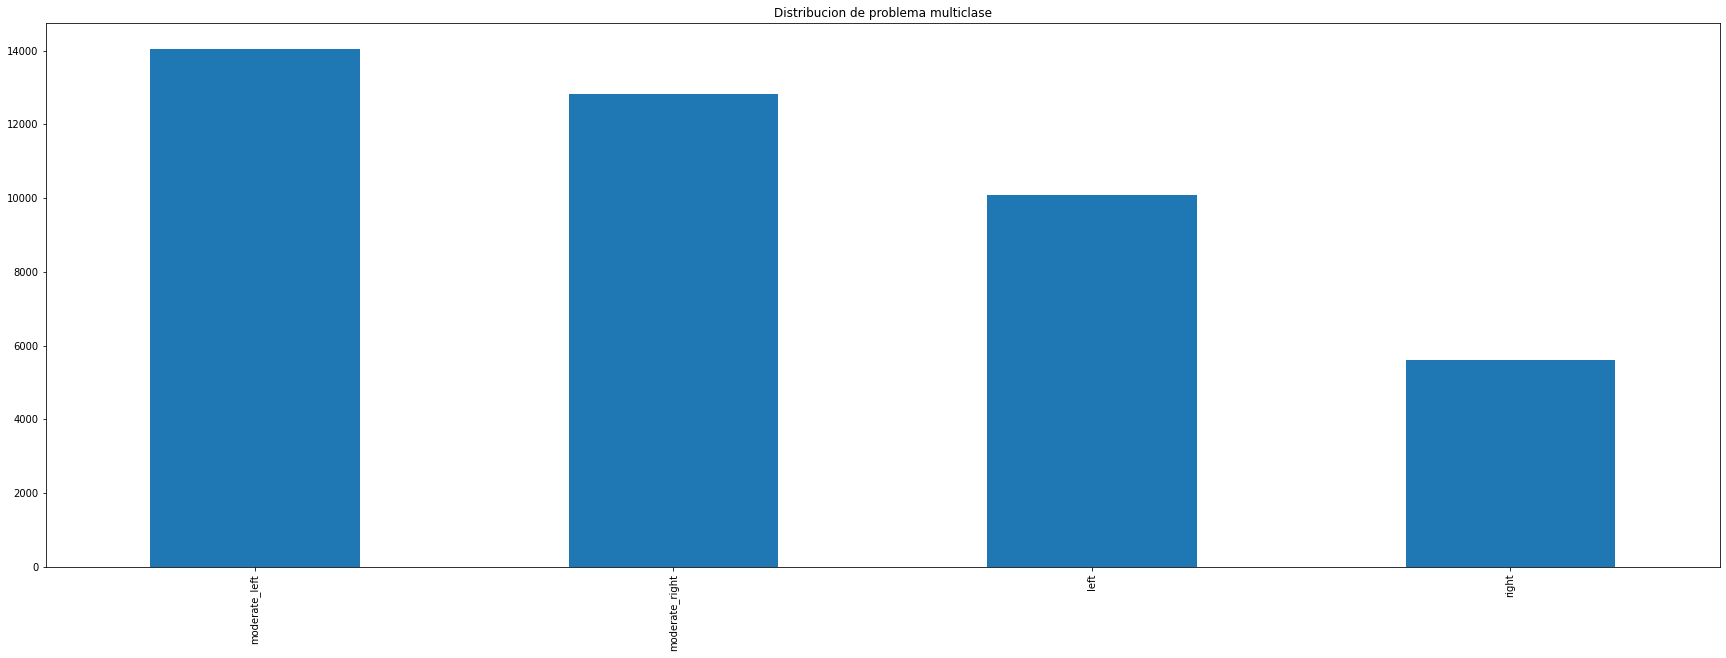

In [ ]:
train['ideology_multiclass'].value_counts().plot(kind='bar', figsize=(30,10), title='Distribucion de problema multiclase')

**Para el problema de ideologia multiclase se tienen proporciones aproximadamente 35-30-20-15 cuando en un problema equilibrado se esperaria contar con 25% por cada una de las clases. Hay que tener cuidado en particular con la ideologia Right que es la que cuenta con menos instancias**

## Cantidad de palabras utilizadas por clase

Se intenta ver si alguna de las clases que se estan estudiando se pueden diferenciar de acuerdo al numero de palabras que utilizan en cada uno de sus posts en Twitter.

In [ ]:
longitud=[len(text.split()) for text in train['tweet']]
train['Longitud']=longitud

In [ ]:
longitud_left=[len(text.split()) for text in train_left['tweet']]

### Longitud de tweets de izquierda

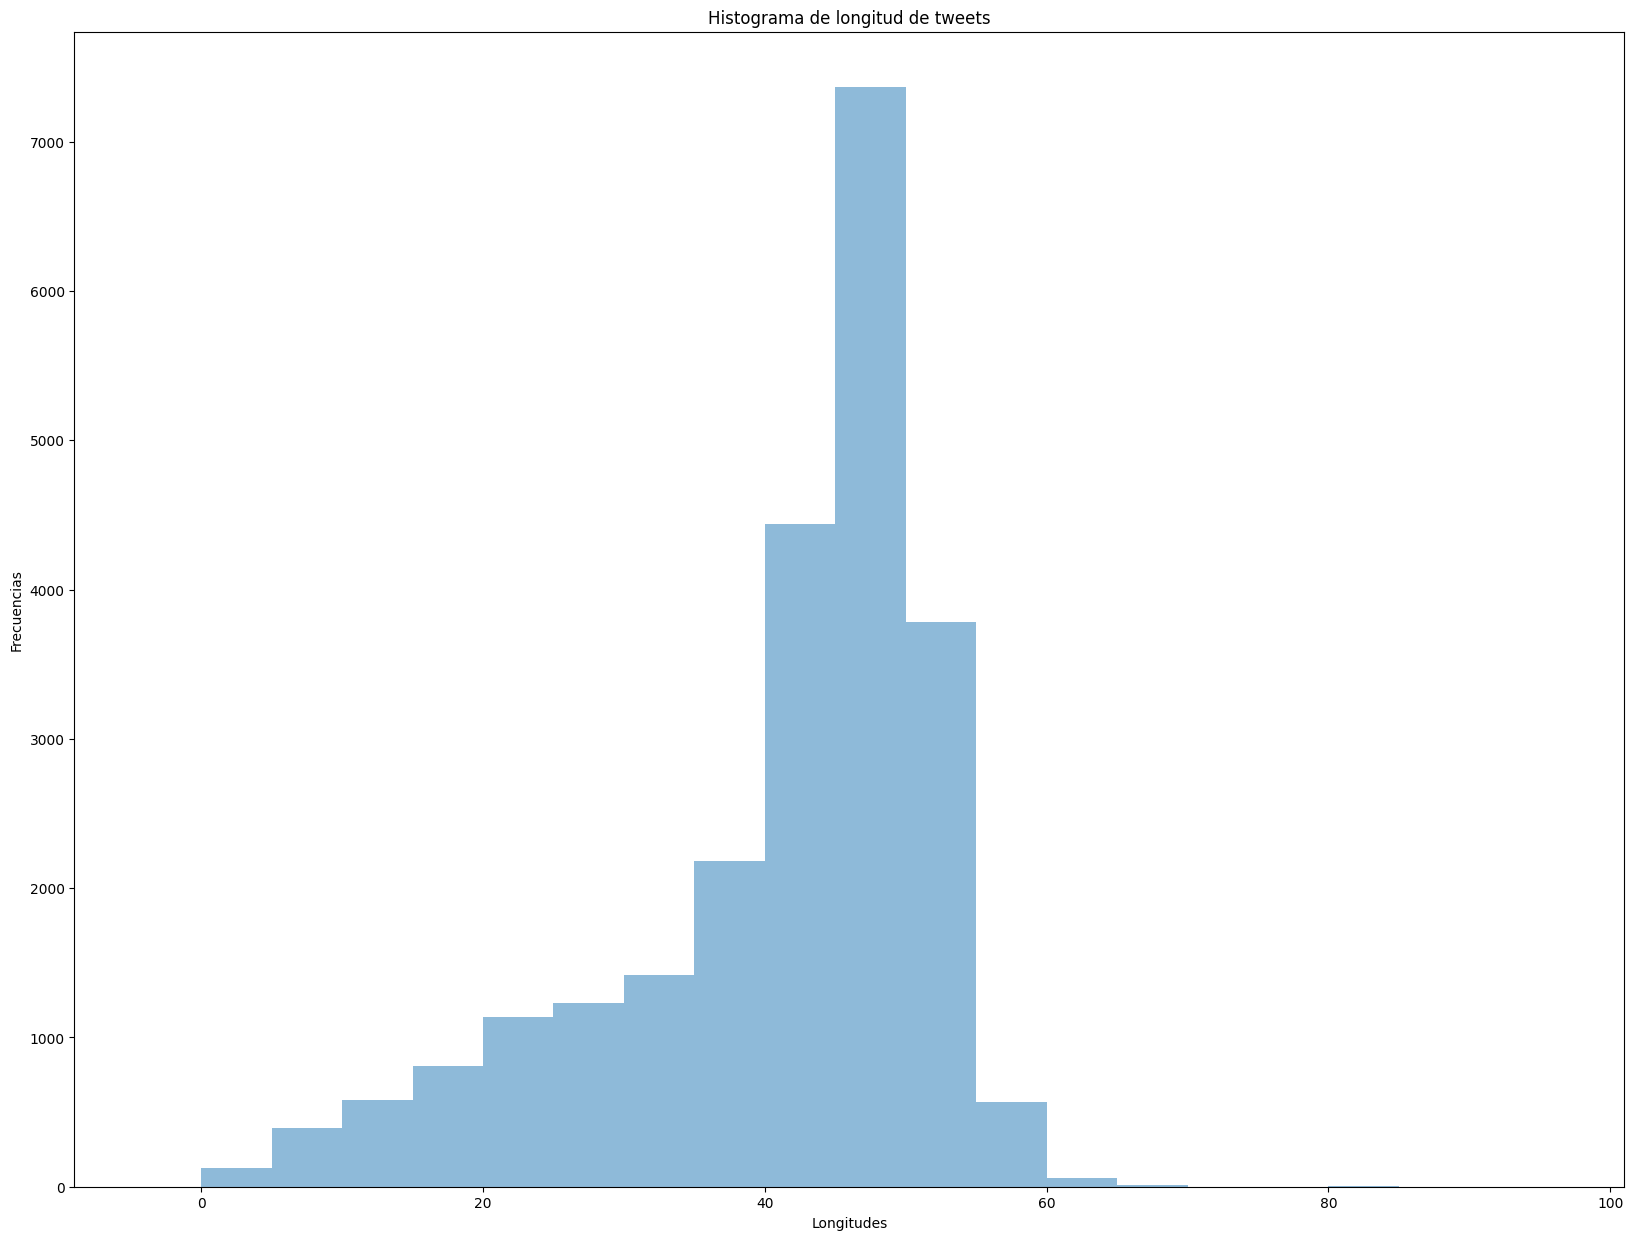

In [ ]:
from matplotlib import pyplot as plt

bins = np.arange(0, max(longitud_left), 5)
plt.xlim([min(longitud_left)-10, max(longitud_left)+10])

plt.hist(longitud_left, bins=bins, alpha=0.5)
plt.title('Histograma de longitud de tweets')
plt.xlabel('Longitudes')
plt.ylabel('Frecuencias')
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

### Longitud de tweets de derecha

In [ ]:
longitud_right=[len(text.split()) for text in train_right['tweet']]

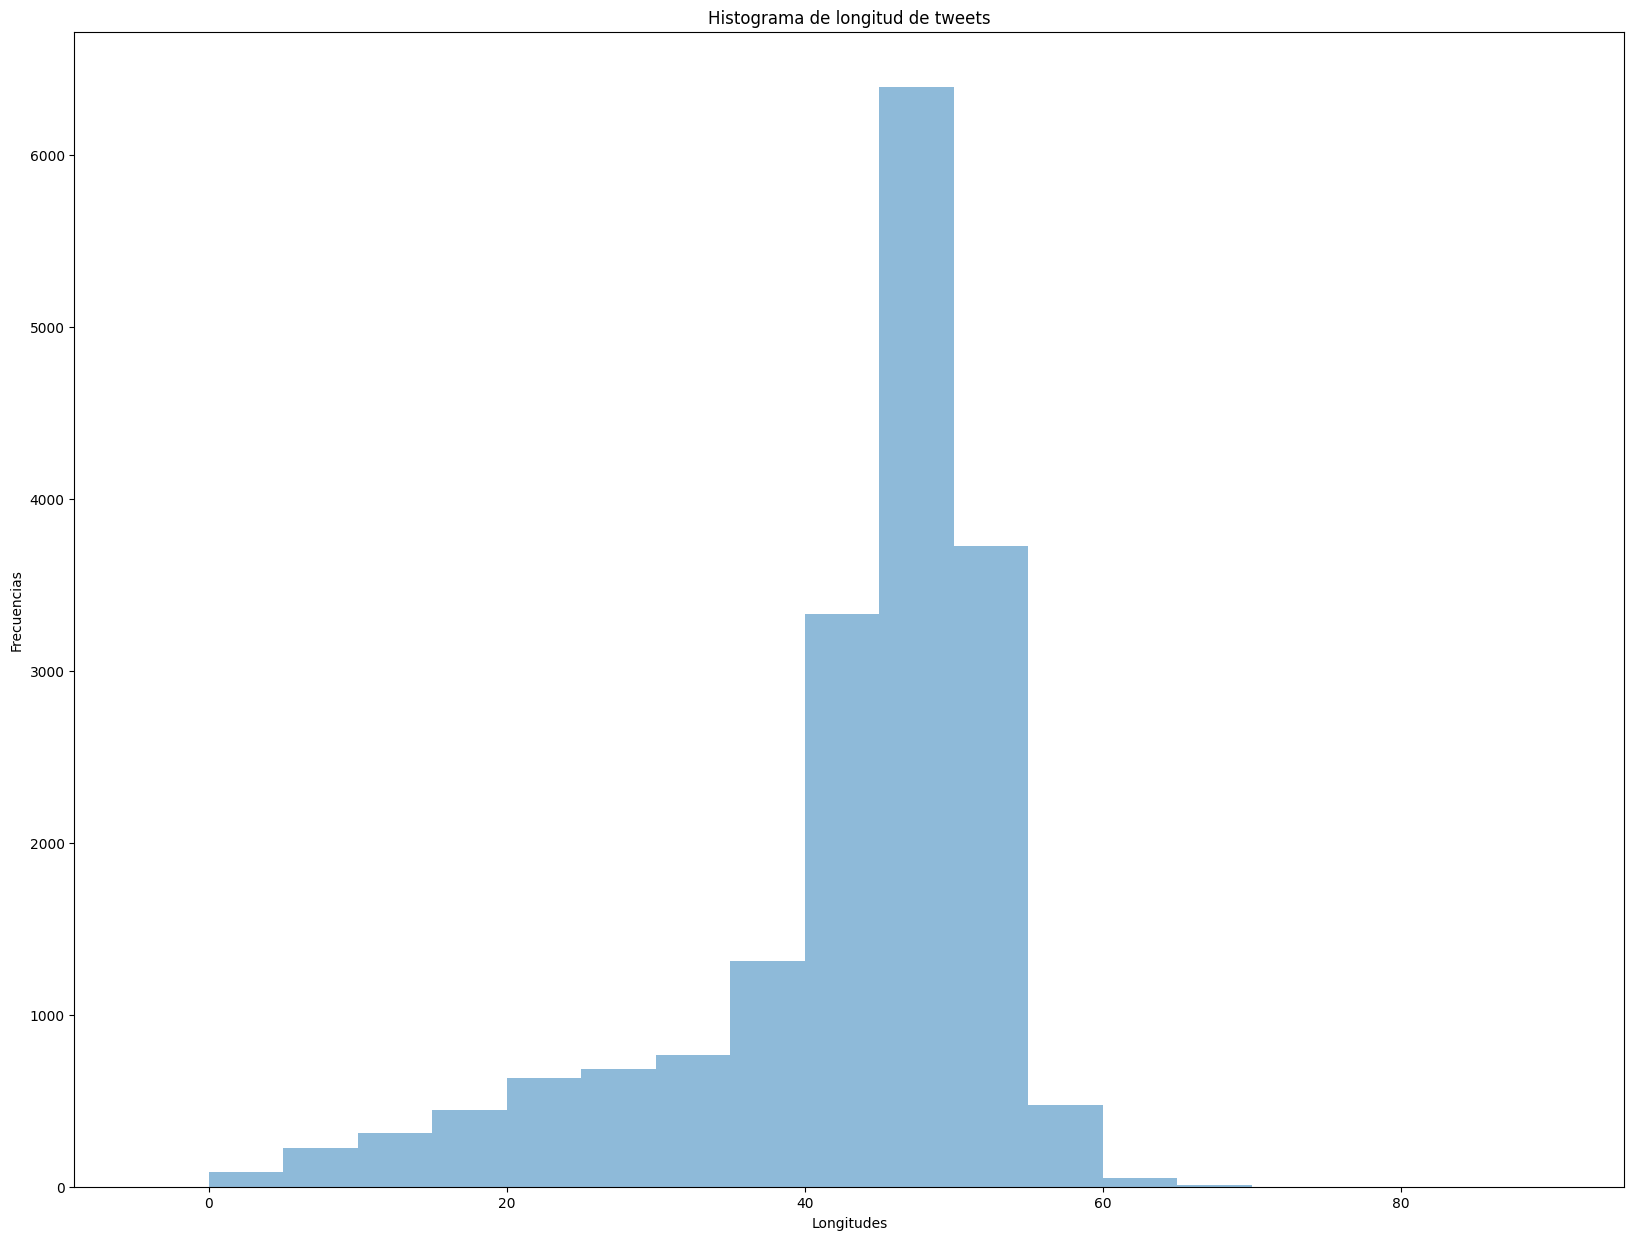

In [ ]:
from matplotlib import pyplot as plt

bins = np.arange(0, max(longitud_right), 5)
plt.xlim([min(longitud_right)-10, max(longitud_right)+10])

plt.hist(longitud_right, bins=bins, alpha=0.5)
plt.title('Histograma de longitud de tweets')
plt.xlabel('Longitudes')
plt.ylabel('Frecuencias')
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

**Guardamos la informacion de las longitudes en caso de que sea relevante**

In [ ]:
train_right['Longitud']=longitud_right
train_left['Longitud']=longitud_left

###Comparacion mediante BOXPLOT

Text(0.5, 1.0, 'Boxplot de longitu de tweet')

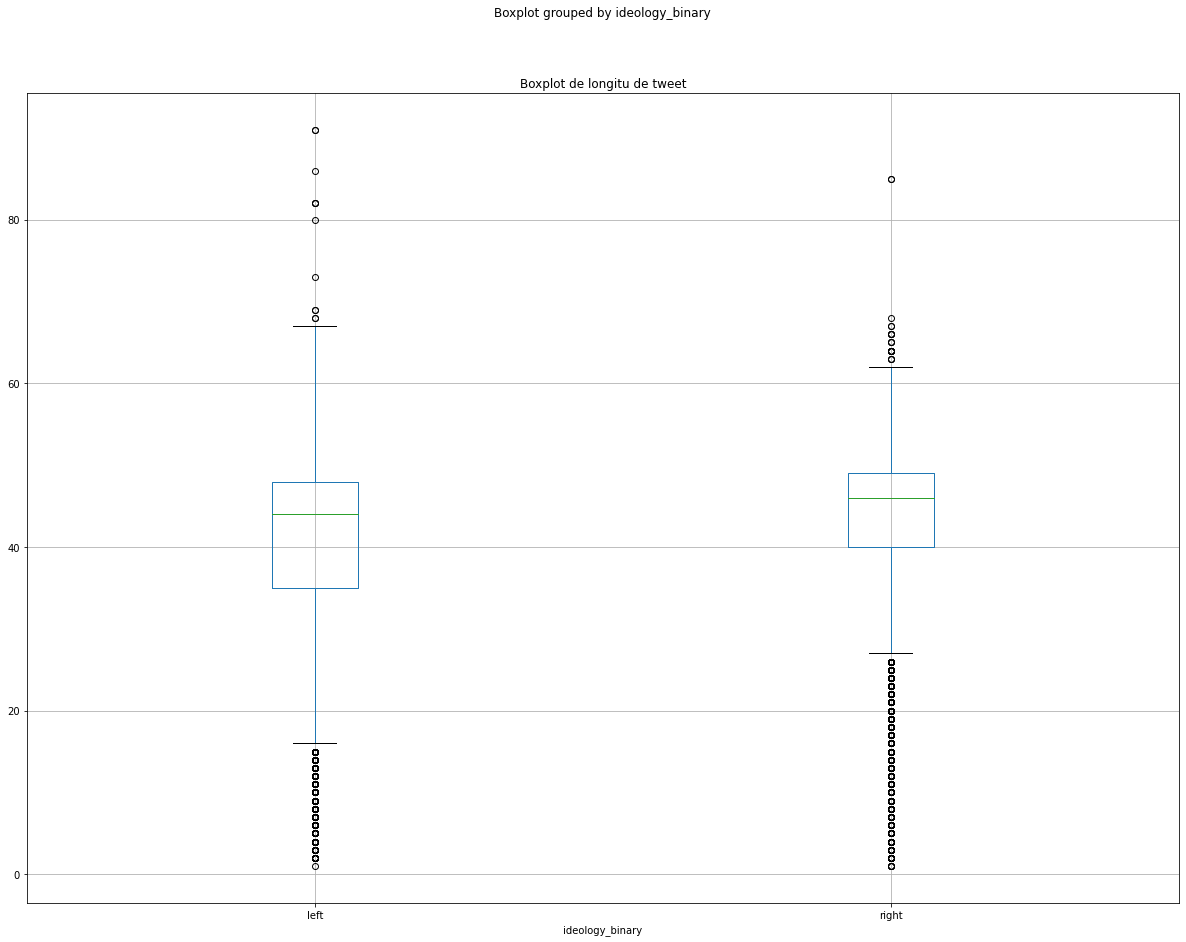

In [ ]:
boxplot = train.boxplot(column=['Longitud'], by='ideology_binary')
boxplot.set_title('Boxplot de longitu de tweet')

#### Conclusion de longitud de palabras de tweets



**El comportamiento medio parece ser bastante similar, suelen acumularse en menos de 20 paabras (izquierda) mientras que debajo de 30 (la derecha). Finalmente parece que los outliers de la izquierda estan mucho mas dispersos, por lo que se podria hablar de que suelen escribir mas**

## Cantidad de caracteres usados por clase

In [ ]:
longitud_char=[len(text) for text in train['tweet']]
train['Longitud Char']=longitud_char

#### Caracteres usados por la izquierda

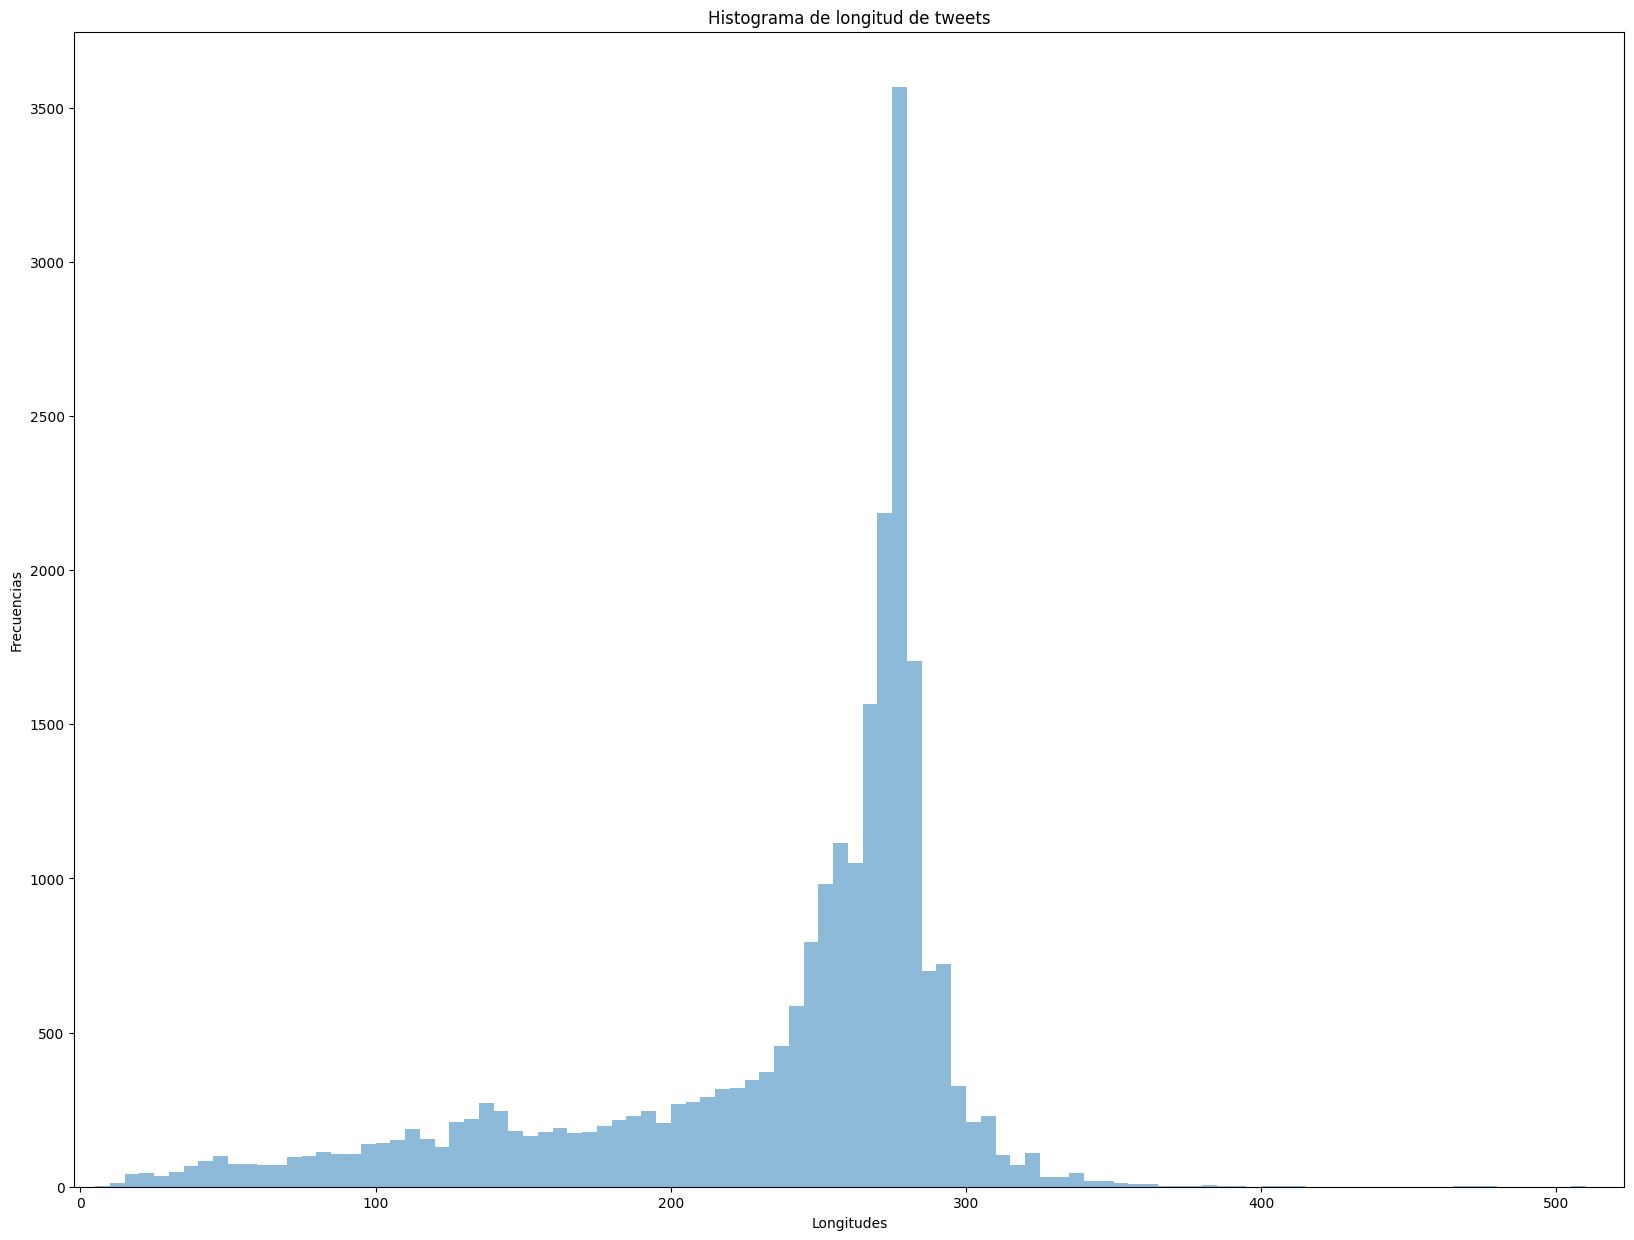

In [ ]:
longitud_left_char=[len(text) for text in train_left['tweet']]

from matplotlib import pyplot as plt

bins = np.arange(0, max(longitud_left_char), 5)
plt.xlim([min(longitud_left_char)-10, max(longitud_left_char)+10])

plt.hist(longitud_left_char, bins=bins, alpha=0.5)
plt.title('Histograma de longitud de tweets')
plt.xlabel('Longitudes')
plt.ylabel('Frecuencias')

plt.show()

####Caracteres usados por la derecha

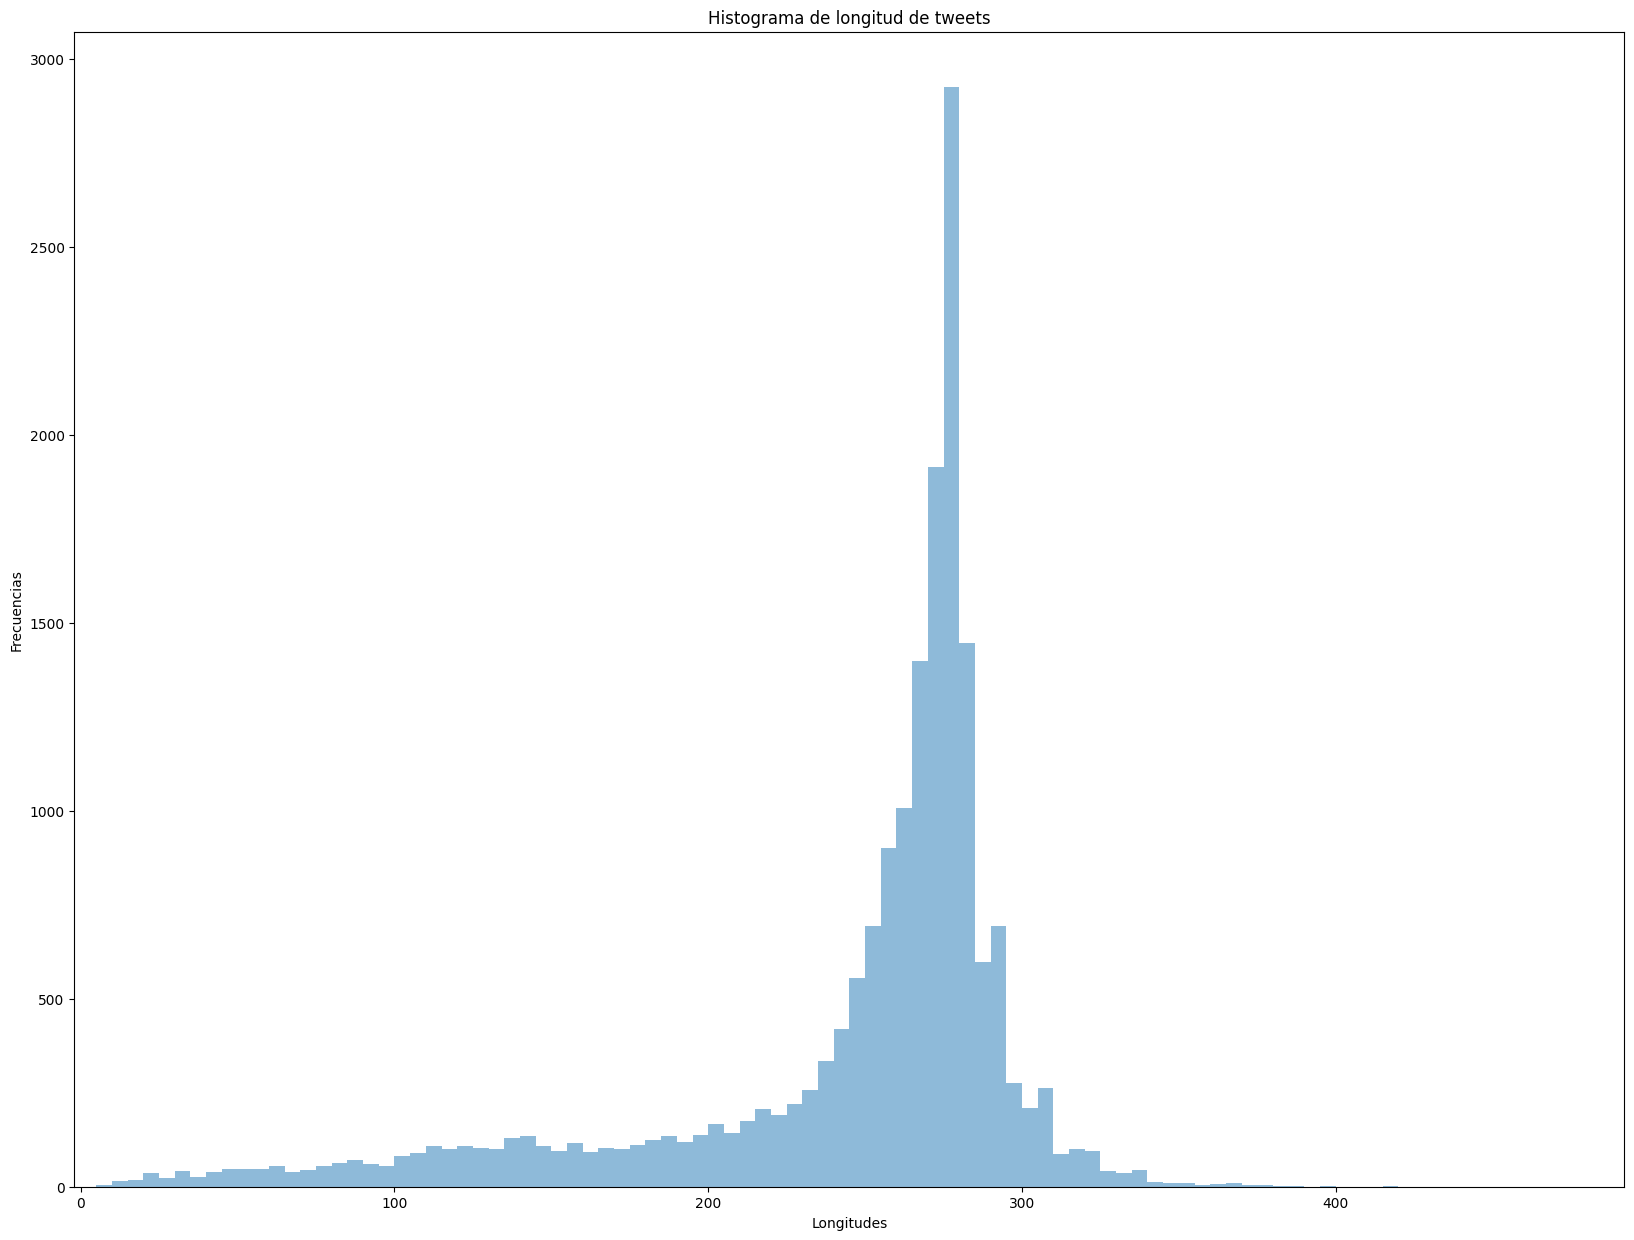

In [ ]:
longitud_right_char=[len(text) for text in train_right['tweet']]

from matplotlib import pyplot as plt

bins = np.arange(0, max(longitud_right_char), 5)
plt.xlim([min(longitud_right_char)-10, max(longitud_right_char)+10])

plt.hist(longitud_right_char, bins=bins, alpha=0.5)
plt.title('Histograma de longitud de tweets')
plt.xlabel('Longitudes')
plt.ylabel('Frecuencias')

plt.show()

### Comparacion mediante BOXPLOT

Text(0.5, 1.0, '')

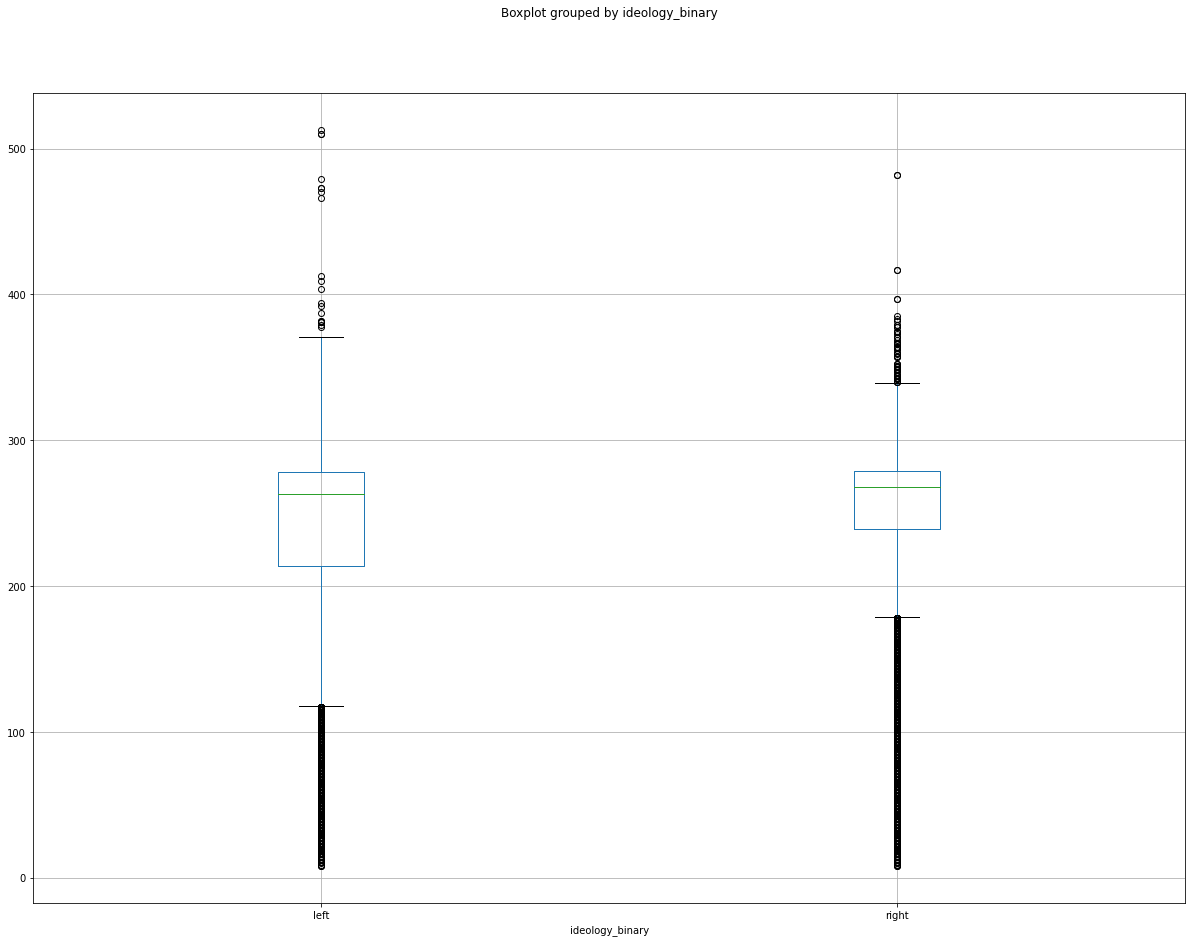

In [ ]:
boxplot = train.boxplot(column=['Longitud Char'], by='ideology_binary')
boxplot.set_title('')

#### Conclusion Caracteres

El comportamiento mostrado por las graficas hablan de que el numero de caracteres usados por las ideologias tiene un comportamiento bastante similar al comportamiento del numero de palabras utilizados

## Sentimiento generado en cada clase

Se propone estudiar la siguiente idea para el problema binario:


**Suponga que uno de los grupos se encuentra en el poder, entonces aquellos miembros simpatizantes generalmente utilizaran expresiones mayormente positiva mientras que los  'rivales'  utilizaran generalmente expresiones negativas. Es por eso que se propone estudiar el sentimiento del tweet como un posible atributo que pueda ayudar a la asignacion de ideologia**

In [ ]:
!pip install pysentimiento

**Se hace uso de Pysentimiento como el mecanismo para estudiar el sentimiento de los Tweets. Es un mecanismo basado en Transformers en particular de BERT para llevar a cabo esta tarea.**

In [ ]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

**El analizar individualmente el sentimiento de cada tweet puede ser bastante tardado, es por eso que se hace de forma paralela mediante un RDD de Spark**

Se crea un entorno de Spark

In [ ]:
#resumen=[generate_summary(texto) for texto in df['Procesado']]
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
# install findspark using pip
!pip install -q findspark

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext()

Se crea un objeto paralelizado de las columnas de interes, en este caso los tweets de la izquierda y la derecha

In [ ]:
Sentimiento=sc.parallelize(train['tweet'])

In [ ]:
sentimiento_left=sc.parallelize(train_left['tweet'])

La funcion se encarga de tomar el output generado por Pysentimiento dado por:
$$P=(P_{1}, P_{2},  P_{3})$$
Donde los $P_{i}$ son las probabilidades que el tweet contenga un sentimiento negativo, neutro o positivo respectivamente.

Entonces el escalar que se toma como expresion de sentimiento numerico para este trabajo esta dado por:
 $$ Sentimiento=   \left\{ \begin{array}{ll}
      P_{1} & P_{1}=max(P_{1}, P_{2},  P_{3}) \\
      0 & P_{2}=max(P_{1}, P_{2},  P_{3}) \\
      -P_{3} & P_{3}=max(P_{1}, P_{2},  P_{3})\\
\end{array}
\right.  $$

In [ ]:
def sentimiento(text):
  aux=analyzer.predict(text)
  if (aux.output=='NEG'):
    return (-aux.probas[aux.output])
  elif (aux.output=='NEU'):
    return (0)
  else:
    return (aux.probas[aux.output])

El metodo map nos permite decirle a Spark que aplique la funcion de interes en este caso **sentimiento** y el atributo collect permite poner los resultados de esta funcion en una lista para poder almacenarla.

In [ ]:
sent=Sentimiento.map(sentimiento).collect()
train['Sentimiento']=sent

####Sentimiento en la izquierda

In [ ]:
sent_left=sentimiento_left.map(sentimiento).collect()
train_left['Sentimiento']=sent_left

Cuenta con un sentimiento promedio negativo

In [ ]:
np.mean(np.array(sent_left))

-0.21052759709273172

#### Sentimiento en la derecha

In [ ]:
sentimiento_right=sc.parallelize(train_right['tweet'])
sent_right=sentimiento_right.map(sentimiento).collect()

In [ ]:
train_right['Sentimiento']=sent_right
np.mean(np.array(sent_right))

### Boxplot de sentimientos de las clases para el problema binario

Text(0.5, 1.0, '')

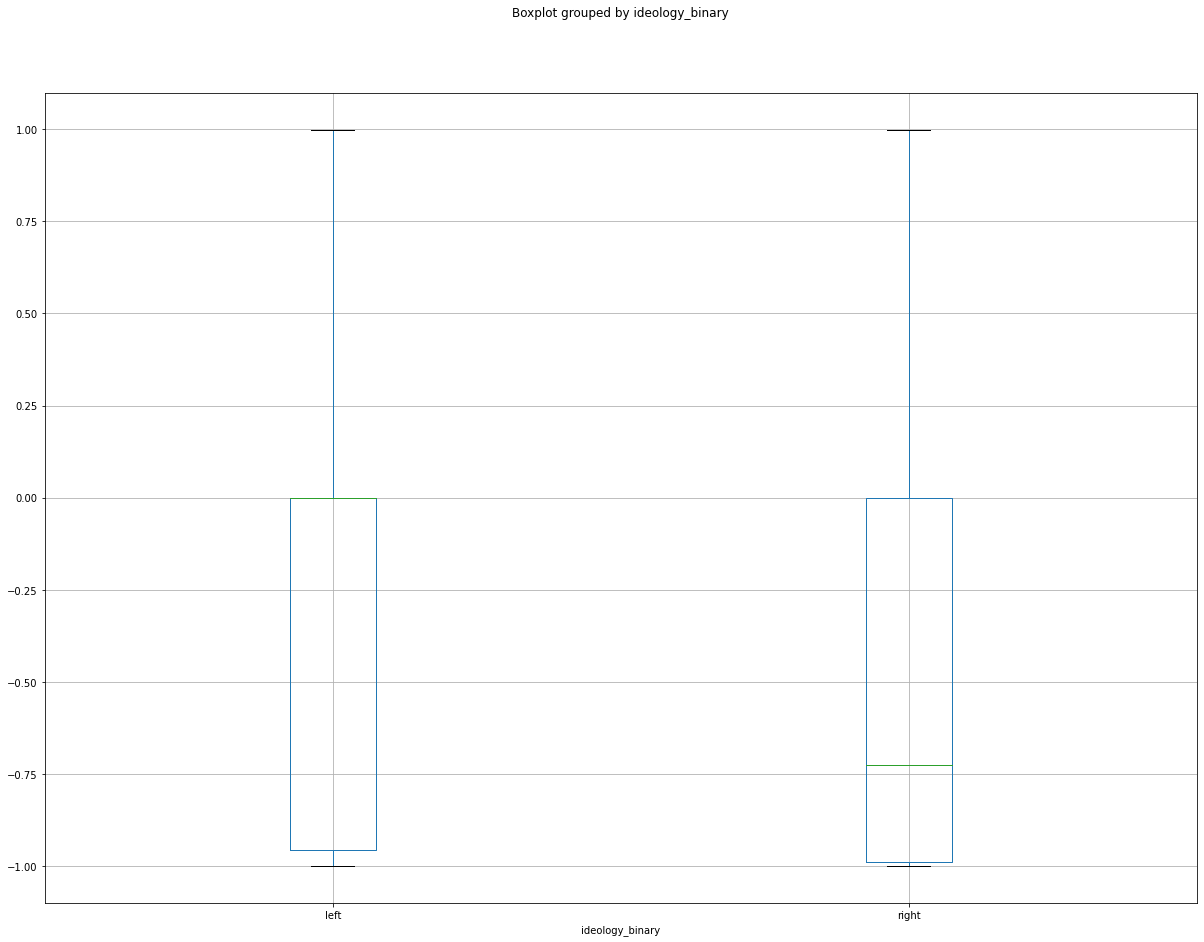

In [ ]:
boxplot = train.boxplot(column=['Sentimiento'], by='ideology_binary')
boxplot.set_title('')

####Conclusion

No parece que se cumpla lo esperado de la polarizacion de sentimientos, ambas clases muestran una expresion mayormente negativas, por lo que no parece que el *sentimiento* sea un atributo que ayude a mejorar la asignacion de ideologia.

In [ ]:
train.to_csv('/content/drive/MyDrive/Tweets/Oficial/Analisis Exploratorio/train1.csv')

##Topicos generados en cada clase:

Otra forma de ver lo que ocurre en cada una de las ideologia es saber de lo que suelen twittear, es por eso que se recurre a los topicos. En este caso de BERTOPIC el cual construye los topicos principalmente basado en frecuencias y hace uso de representaciones BERT para el resto del proceso.

####BERT TOPIC

In [ ]:
!pip install bertopic

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Tweets/Oficial/Analisis Exploratorio/train1.csv')
train_left= pd.read_csv('/content/drive/MyDrive/Tweets/Oficial/Analisis Exploratorio/TrainL+Sent.csv')
train_right=pd.read_csv('/content/drive/MyDrive/Tweets/Oficial/Analisis Exploratorio/TrainR+Sent.csv')

#####Derecha

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="multilingual", calculate_probabilities=True, verbose=True, top_n_words=10)
topics, probs = topic_model.fit_transform(list(train_right['tweet']))

Batches:   0%|          | 0/577 [00:00<?, ?it/s]

2023-03-15 21:47:07,693 - BERTopic - Transformed documents to Embeddings
2023-03-15 21:47:21,839 - BERTopic - Reduced dimensionality
2023-03-15 21:47:52,293 - BERTopic - Clustered reduced embeddings


Conjunto de topicos generados

In [ ]:
freq = topic_model.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,9611,-1_de_la_que_el
1,0,401,0_user_gracias_me_programa
2,1,350,1_virgen_día_patrona_san
3,2,314,2_españa_user_españoles_presidente
4,3,256,3_educación_padres_hijos_educativo
5,4,224,4_cataluña_catalanes_separatismo_catalán
6,5,208,5_mujeres_feminismo_igualdad_mujer
7,6,200,6_paro_empleo_pib_españa
8,7,182,7_madrid_madrileños_ciudad_ayto
9,8,178,8_political_party_votos_mesa_partido


In [ ]:
topic_model.get_topic(1)

[('virgen', 0.01352347887805894),
 ('día', 0.010563379503506753),
 ('patrona', 0.010563216725829126),
 ('san', 0.010312697878980004),
 ('bandera', 0.010269593753787293),
 ('santa', 0.009077394996919577),
 ('fiestas', 0.007822764380895814),
 ('nuestra', 0.007240473654331542),
 ('año', 0.007233685360826219),
 ('la', 0.0068771181013864875)]

In [ ]:
topic_model.get_topic(5)

[('mujeres', 0.03525553010219576),
 ('feminismo', 0.030283486479882053),
 ('igualdad', 0.017411897203908427),
 ('mujer', 0.01734976336890646),
 ('hombres', 0.010724366982398011),
 ('feminista', 0.01019086040846815),
 ('género', 0.010140753908514846),
 ('feministas', 0.009291397790587456),
 ('femenino', 0.00804541611194854),
 ('las', 0.00803381512126794)]

In [ ]:
topic_model.get_topic(6)

[('paro', 0.017641214374021573),
 ('empleo', 0.01621279676728879),
 ('pib', 0.016145181186739913),
 ('españa', 0.014306673924975566),
 ('economía', 0.013575545771657314),
 ('000', 0.010609786809910794),
 ('mayor', 0.009913240751986666),
 ('parados', 0.009768371133080994),
 ('caída', 0.009701953531480798),
 ('millones', 0.009517986244238672)]

Topics Chart

In [ ]:
topic_model.visualize_barchart(top_n_topics=8)

##### Izquierda

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="multilingual", calculate_probabilities=True, verbose=True, top_n_words=10)
topics, probs = topic_model.fit_transform(list(train_left['tweet']))

Batches:   0%|          | 0/754 [00:00<?, ?it/s]

2023-03-15 22:17:05,835 - BERTopic - Transformed documents to Embeddings
2023-03-15 22:17:22,250 - BERTopic - Reduced dimensionality
2023-03-15 22:18:27,693 - BERTopic - Clustered reduced embeddings


In [ ]:
topic_model.topics_[:10]

[-1, -1, 23, -1, -1, -1, -1, 0, -1, 196]

In [ ]:
freq = topic_model.get_topic_info(); freq.head(10)

,Topic,Count,Name
0,-1,12592,-1_user_de_la_que
1,0,631,0_ue_europa_europea_europeo
2,1,582,1_madrid_ayuso_comunidad_almeida
3,2,478,2_political_party_política_voto_derecha
4,3,265,3_vacunación_vacunas_vacuna_dosis
5,4,265,4_familia_pésame_su_muerte
6,5,244,5_españa_derecha_española_españoles
7,6,206,6_justicia_judicial_supremo_juez
8,7,201,7_twitter_yo_me_no
9,8,201,8_sánchez_rivera_pedro_political_party


In [ ]:
topic_model.get_topic(0)

[('ue', 0.01985251988150807),
 ('europa', 0.017814230793823993),
 ('europea', 0.011829669974408895),
 ('europeo', 0.009600689599423723),
 ('europeos', 0.008283608248791907),
 ('fondos', 0.006012252259741422),
 ('unión', 0.005624434591020602),
 ('migrantes', 0.005477392742584234),
 ('consejo', 0.005014838685559697),
 ('la', 0.004989757505925209)]

In [ ]:
topic_model.get_topic(1)

[('madrid', 0.032161755390267055),
 ('ayuso', 0.017230251224376412),
 ('comunidad', 0.009472846696464811),
 ('almeida', 0.00607983325509002),
 ('madrileños', 0.005865700076199208),
 ('no', 0.004715758375828284),
 ('que', 0.004456433584404273),
 ('de', 0.004215519350188815),
 ('es', 0.0041735040505736015),
 ('fase', 0.004158924688501571)]

In [ ]:
topic_model.get_topic(8)

[('sánchez', 0.04436683589559238),
 ('rivera', 0.023332976528162932),
 ('pedro', 0.022999771296639056),
 ('political_party', 0.009671063592619137),
 ('sanchez', 0.00809053354945276),
 ('le', 0.006676394470170163),
 ('gobierno', 0.006640922136963683),
 ('investidura', 0.006385560384338138),
 ('podemos', 0.005606446981367044),
 ('no', 0.005514006898464409)]

Topics Chart

In [ ]:
topic_model.visualize_barchart(top_n_topics=12)

## Tweets que contienen algun hashtag



In [ ]:
import re

valor=len(train['tweet'])*[False]

for i,text in enumerate(train['tweet']):
  if re.search(r'(?=.*#\b)', text):
    valor[i]=True

train['Hash']=valor

**Se puede ver que una cuarta parte de los tweets filtrados contienen algun
tipo de uso de Hashtag, entonces vale la pena revisar la informacion que nos proporcionan**

<AxesSubplot:title={'center':'Distribucon de elementos con un hashtag'}>

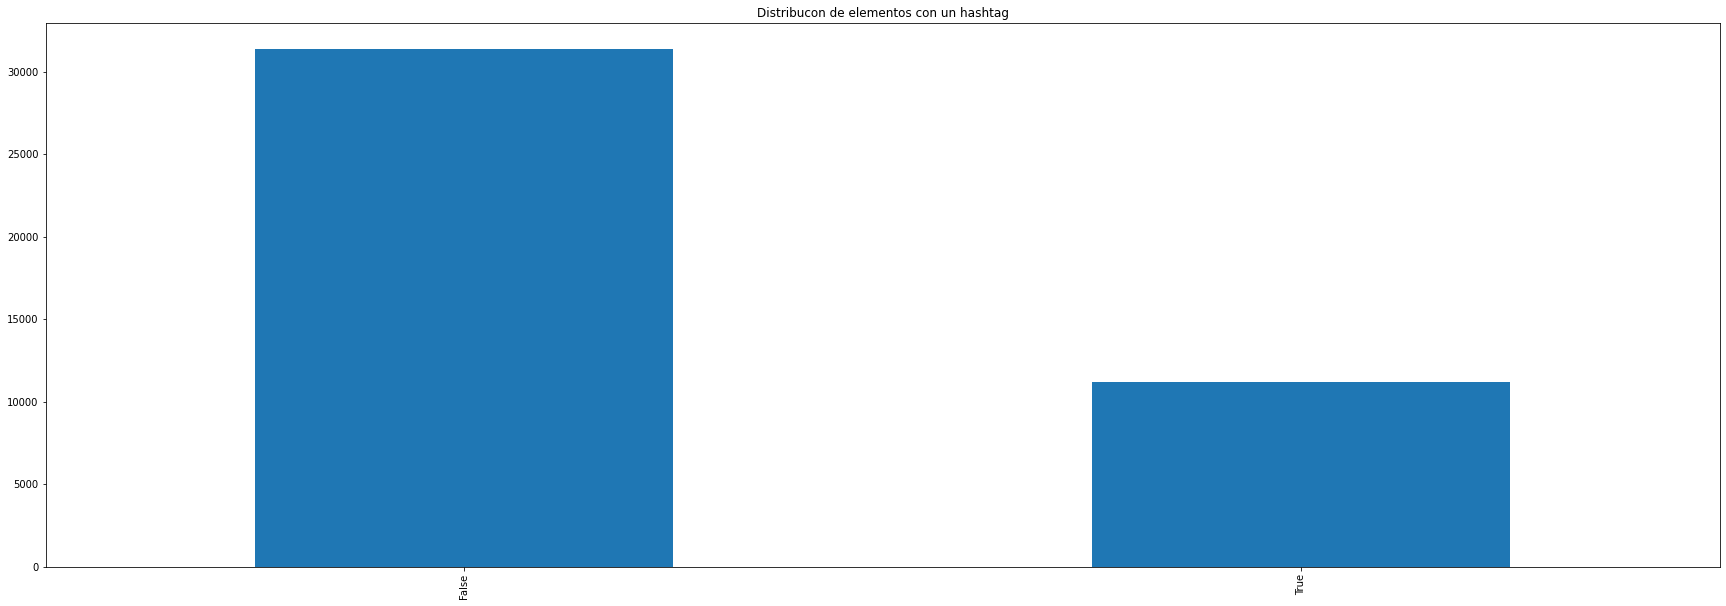

In [ ]:
train['Hash'].value_counts().plot(kind='bar', figsize=(30,10), title='Distribucon de elementos con un hashtag')

**La poblacion de tweets del conjunto de entrenamiento cuenta con menos del 25% de tweets con Hashtag, es por eso que no se utiliza como un atributo de interes para la asignacion**

En caso de contar con un numero significativo de tweets con hashtag se puede estudiar:

*   Numero de Hashtags
*   Longitud de Hashtags
*   Segmentacion de texto (convertir hashtags en las palabras que la componen)



